In [1]:
import pandas as pd

df = pd.read_csv("HIPAA-breach-report-2009-to-2017.csv")
df = df.dropna()

In [2]:
df.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/2009,Theft,Paper/Films,No,A binder containing the protected health infor...
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/2009,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/2009,Theft,"Other, Other Portable Electronic Device",No,\N
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/2009,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/2009,Theft,Desktop Computer,No,A shared Computer that was used for backup was...


<AxesSubplot:title={'center':'Breach Size Distribution'}, ylabel='Frequency'>

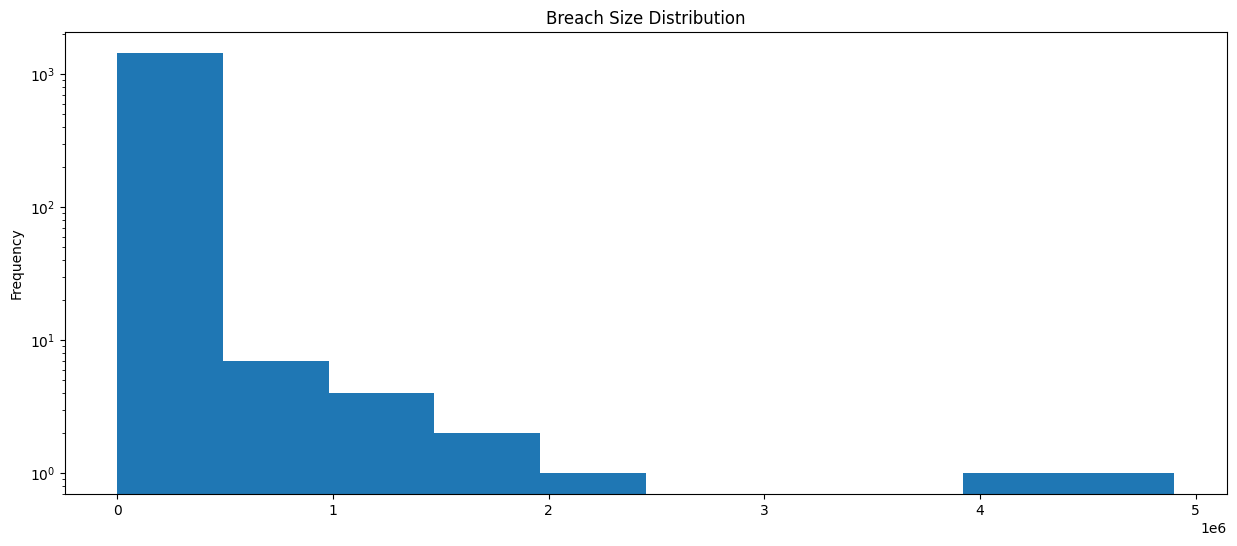

In [3]:
%matplotlib inline
def_fig_size = (15, 6)
df["Individuals Affected"].plot(
    kind="hist", figsize=def_fig_size, log=True, title="Breach Size Distribution"
)

<AxesSubplot:title={'center':'Average Breach Size by Entity Type'}, xlabel='Covered Entity Type'>

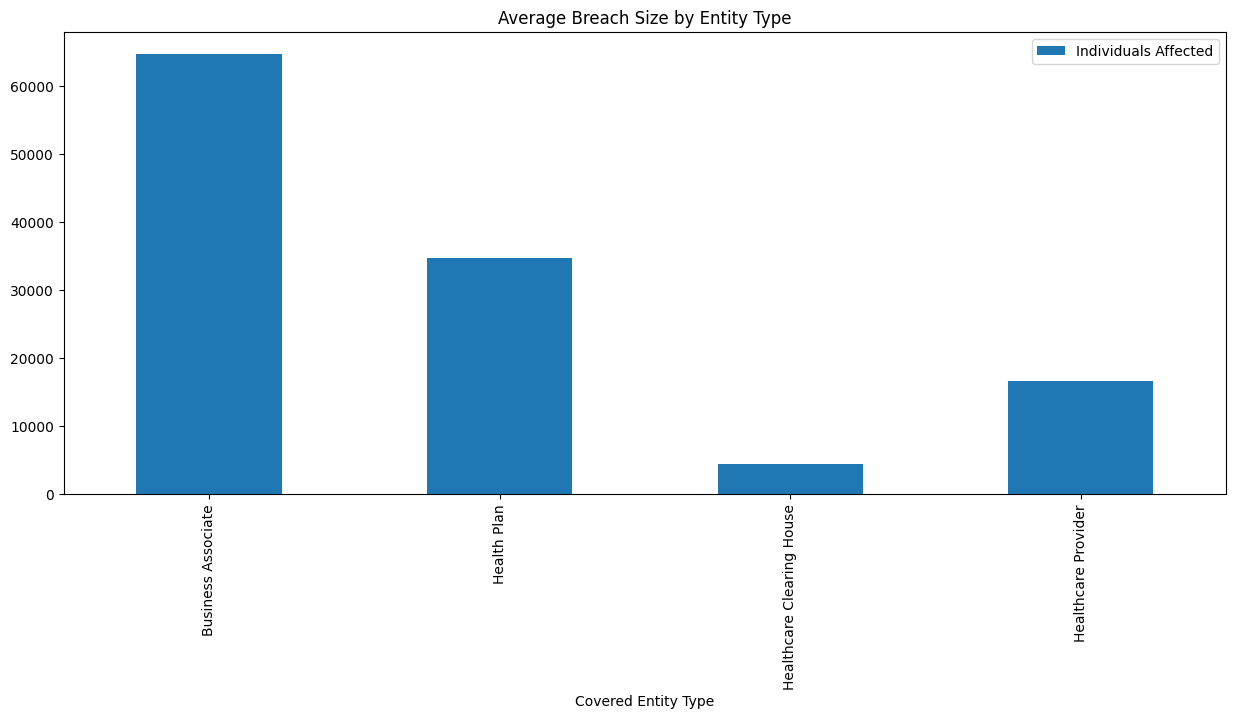

In [4]:
df.groupby("Covered Entity Type").mean().plot(
    kind="bar", figsize=def_fig_size, title="Average Breach Size by Entity Type"
)

<AxesSubplot:ylabel='Individuals Affected'>

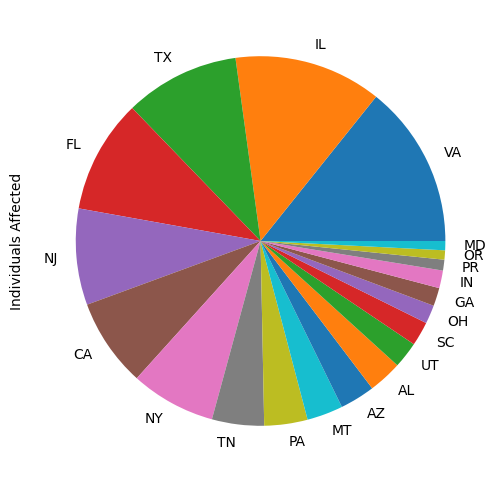

In [5]:
df.groupby("State").sum().nlargest(20, "Individuals Affected").plot.pie(
    y="Individuals Affected", figsize=def_fig_size, legend=False
)

<AxesSubplot:title={'center':'Average Breach Size by Entity Type'}, xlabel='Type of Breach'>

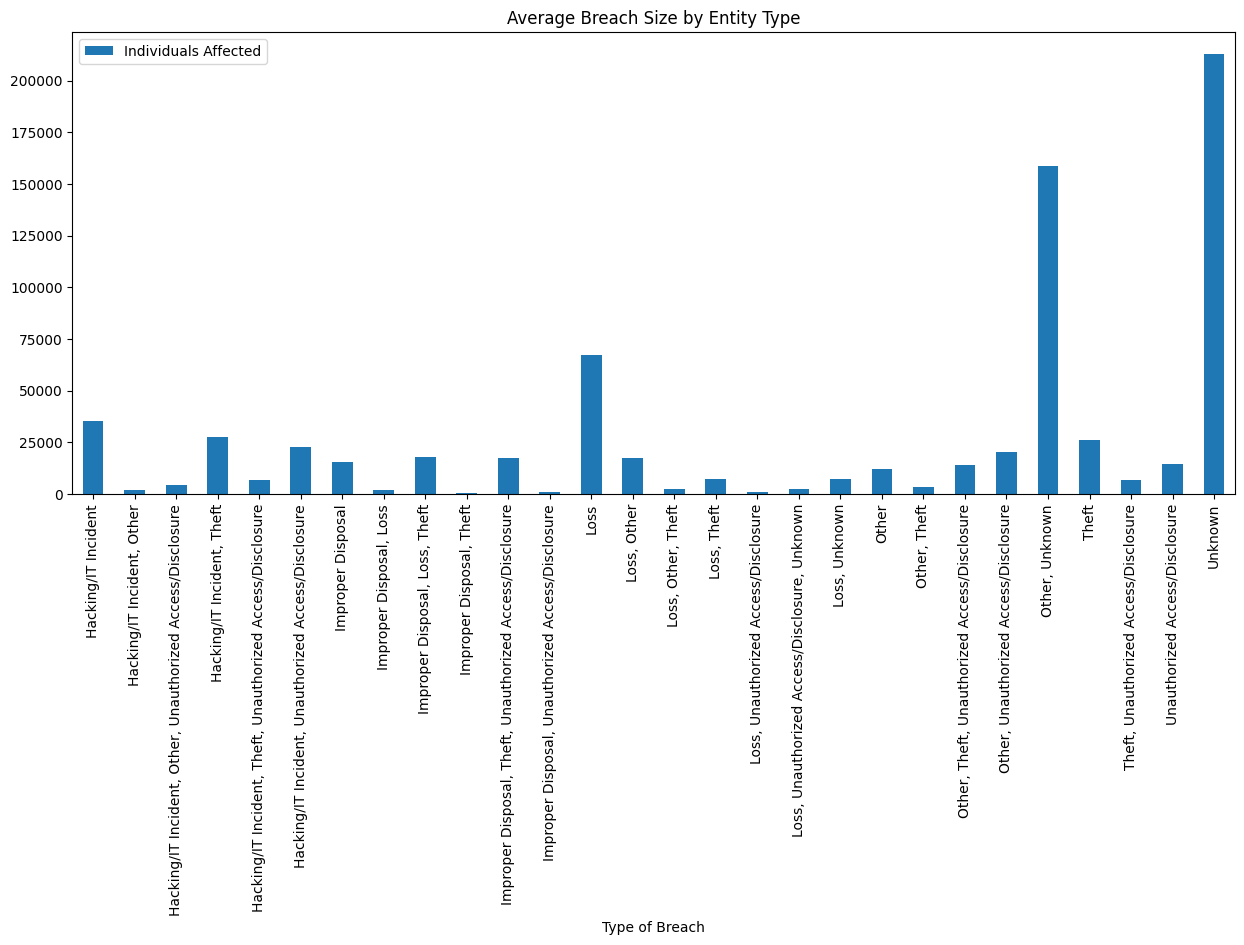

In [6]:
df.groupby("Type of Breach").mean().plot(
    kind="bar", figsize=def_fig_size, title="Average Breach Size by Entity Type"
)

In [7]:
df["Web Description"] = df["Web Description"].str.replace("\r", " ")
X = df["Web Description"].values

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [9]:
X_transformed = vectorizer.fit_transform(X)

In [10]:
import numpy as np

feature_array = np.array(vectorizer.get_feature_names())
tfidf_sorting = np.argsort(X_transformed.toarray()).flatten()[::-1]
n = 15
top_n = feature_array[tfidf_sorting][:n]
print(top_n)

['this' 'review' '842' 'south' 'ransomware' 'memorial' 'specific'
 'birthdates' 'consolidated' 'malware' 'license' 'driver' 'found' 'clinic'
 'information']


In [11]:
k = 2
i = 0
for x in df["Web Description"].values:
    if "review" in x:
        i += 1
        print(x)
        print()
        if i == k:
            break

A laptop was lost by an employee while in transit on public transportation.  The computer contained the protected health information of 3800 individuals.  The protected health information involved in the breach included names, Medicaid ID numbers, dates of birth, and primary physicians.  In response to this incident, the covered entity took steps to enforce the requirements of the Privacy & Security Rules.  The covered entity has installed encryption software on all employee computers, strengthened access controls including passwords, reviewed and updated security policies and procedures, and updated it risk assessment.  In addition, all employees received additional security training.   \

The covered entity's (CE) business associate (BA) incorrectly updated contract holders' addresses and mailed protected health information (PHI) to the wrong address of approximately 3,400 individuals.  The PHI involved included demographic information, explanations of benefits, clinical information,